# 1) Data Pre-Processing

In [83]:
import pandas as pd

file_path = r'C:\Users\gouri\OneDrive\Desktop\python project\data set\myexcel.xlsx'

try:
    df = pd.read_excel(file_path)
    print("Data loaded successfully! Here's a preview:")
    print(df.head())
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Data loaded successfully! Here's a preview:
            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  
0     180              Texas  7730337.0  
1     235          Marquette  6796117.0  
2     205  Boston University        NaN  
3     185      Georgia State  1148640.0  
4     231                NaN  5000000.0  


In [81]:
print(df.info())  
print(df.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       458 non-null    object  
 1   Team       458 non-null    object  
 2   Number     458 non-null    int64   
 3   Position   458 non-null    object  
 4   Age        458 non-null    int64   
 5   Height     458 non-null    int32   
 6   Weight     458 non-null    int64   
 7   College    458 non-null    object  
 8   Salary     458 non-null    float64 
 9   age_group  437 non-null    category
dtypes: category(1), float64(1), int32(1), int64(3), object(4)
memory usage: 31.2+ KB
None
           Number         Age      Height      Weight        Salary
count  458.000000  458.000000  458.000000  458.000000  4.580000e+02
mean    17.713974   26.934498  165.554585  221.543668  4.833970e+06
std     15.966837    4.400128    9.192940   26.343200  5.163335e+06
min      0.000000   19.000000  150.00000

In [28]:
null_counts = df.isnull().sum()
print("\nNull values in each column:")
print(null_counts)


for column in df.columns:
    if null_counts[column] > 0:  
        if pd.api.types.is_numeric_dtype(df[column]):  
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"Null values in column '{column}' replaced with mean value: {mean_value:.2f}")
        else:
            print(f"Null values found in non-numeric column '{column}'. Skipping replacement.")



Null values in each column:
Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [20]:
if 'College' in df.columns:
    print("Unique college values:")
    print(df['College'].unique())
else:
    print("The 'college' column is not present in the dataset.")


Unique college values:
['Texas' 'Marquette' 'Boston University' 'Georgia State' nan 'LSU'
 'Gonzaga' 'Louisville' 'Oklahoma State' 'Ohio State' 'Washington'
 'Kentucky' 'North Carolina' 'Arizona' 'Georgia Tech' 'Cincinnati'
 'Miami (FL)' 'Stanford' 'Syracuse' 'Saint Louis' 'Kansas' 'Georgetown'
 'Texas A&M' 'UCLA' 'UNLV' 'Wichita State' "Saint Joseph's" 'Notre Dame'
 'Norfolk State' 'Duke' 'Murray State' 'Tennessee State' 'Bowling Green'
 'Purdue' 'Wake Forest' 'Michigan' 'Missouri' 'USC' 'Villanova' 'Rider'
 'Utah' 'Belmont' 'Davidson' 'Vanderbilt' 'Michigan State' 'Florida'
 'Washington State' 'Arizona State' 'Oklahoma' 'Wyoming' "St. John's"
 'Maryland' 'Wisconsin' 'Utah Valley' 'North Carolina State'
 'UC Santa Barbara' 'Baylor' 'Connecticut' 'Oregon State' 'New Mexico'
 'Oregon' 'Creighton' 'Arkansas' 'Memphis' "Saint Mary's" 'Tennessee'
 'Alabama' 'Georgia' 'Colorado' 'Boston College' 'Temple' 'Fresno State'
 'IUPUI' 'Eastern Washington' 'Western Michigan' 'Virginia' 'Northeaster

In [30]:
if 'College' in df.columns:
    df['College'].fillna('Not Specified', inplace=True)
    
    print("Missing values in 'College' have been filled with 'Not Specified'.")
else:
    print("The 'college' column is not found in the dataset.")


Missing values in 'College' have been filled with 'Not Specified'.


In [24]:
print("Unique values in 'College':", df['College'].unique())

Unique values in 'College': ['Texas' 'Marquette' 'Boston University' 'Georgia State' 'Not Specified'
 'LSU' 'Gonzaga' 'Louisville' 'Oklahoma State' 'Ohio State' 'Washington'
 'Kentucky' 'North Carolina' 'Arizona' 'Georgia Tech' 'Cincinnati'
 'Miami (FL)' 'Stanford' 'Syracuse' 'Saint Louis' 'Kansas' 'Georgetown'
 'Texas A&M' 'UCLA' 'UNLV' 'Wichita State' "Saint Joseph's" 'Notre Dame'
 'Norfolk State' 'Duke' 'Murray State' 'Tennessee State' 'Bowling Green'
 'Purdue' 'Wake Forest' 'Michigan' 'Missouri' 'USC' 'Villanova' 'Rider'
 'Utah' 'Belmont' 'Davidson' 'Vanderbilt' 'Michigan State' 'Florida'
 'Washington State' 'Arizona State' 'Oklahoma' 'Wyoming' "St. John's"
 'Maryland' 'Wisconsin' 'Utah Valley' 'North Carolina State'
 'UC Santa Barbara' 'Baylor' 'Connecticut' 'Oregon State' 'New Mexico'
 'Oregon' 'Creighton' 'Arkansas' 'Memphis' "Saint Mary's" 'Tennessee'
 'Alabama' 'Georgia' 'Colorado' 'Boston College' 'Temple' 'Fresno State'
 'IUPUI' 'Eastern Washington' 'Western Michigan' 'Virgi

In [26]:
pd.DataFrame(df)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,Not Specified,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,Not Specified,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,Not Specified,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,9.472760e+05


In [32]:
import numpy as np

if 'Height' in df.columns:
    df['Height'] = np.random.randint(150, 181, size=len(df))
    print("Height column replaced with random values between 150 and 180.")
else:
    print("Height column not found in the dataset.")

Height column replaced with random values between 150 and 180.


In [38]:
pd.DataFrame(df)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,178,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,180,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,166,205,Boston University,4.833970e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,180,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,151,231,Not Specified,5.000000e+06
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,174,203,Butler,2.433333e+06
454,Raul Neto,Utah Jazz,25,PG,24,167,179,Not Specified,9.000000e+05
455,Tibor Pleiss,Utah Jazz,21,C,26,154,256,Not Specified,2.900000e+06
456,Jeff Withey,Utah Jazz,24,C,26,175,231,Kansas,9.472760e+05


# 2) Data Analysis

Employee distribution by team:
Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage distribution by team:
Team
New Orleans Pelicans      4.1

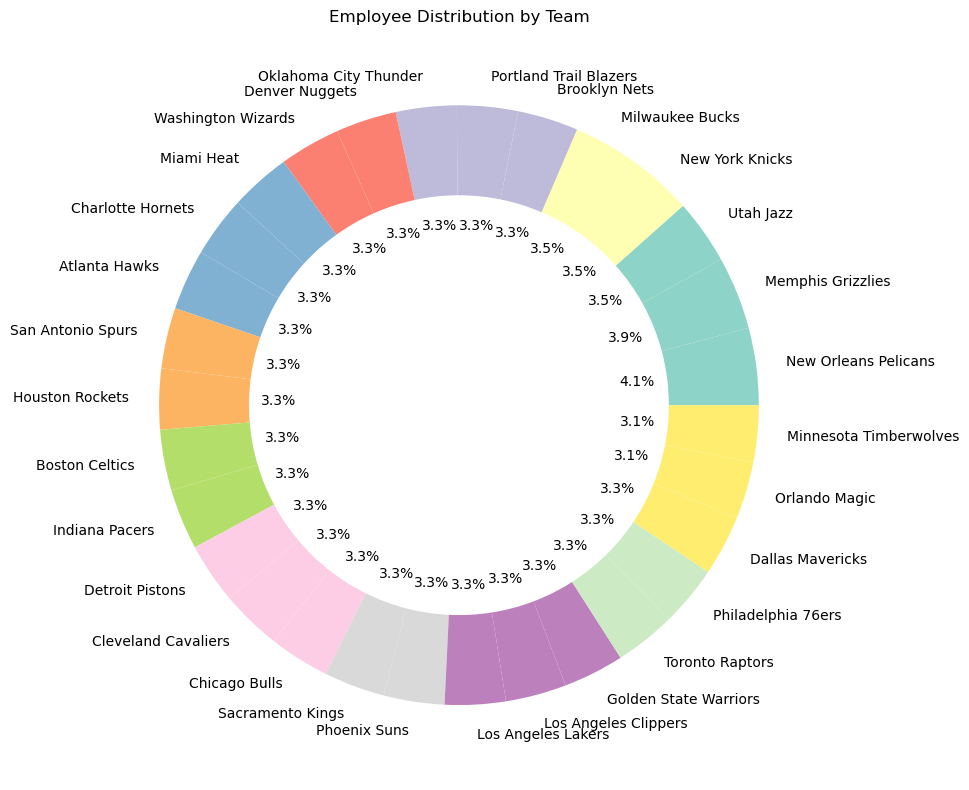

In [69]:
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

print("Employee distribution by team:")
print(team_distribution)
print("\nPercentage distribution by team:")
print(team_percentage)

plt.figure(figsize=(10, 8)) 
team_distribution.plot(kind='pie', autopct='%1.1f%%', cmap='Set3', legend=False, wedgeprops={'width': 0.3})
plt.title("Employee Distribution by Team")
plt.ylabel('') 
plt.tight_layout()  
plt.show()

Employee distribution by position:
Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


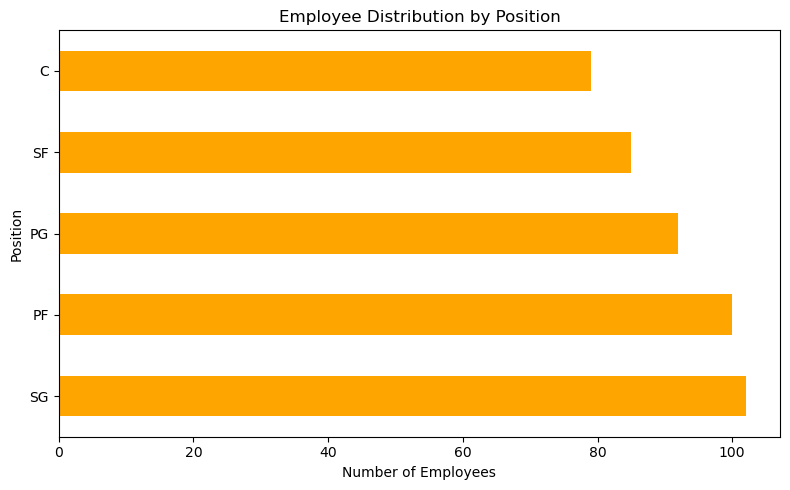

In [59]:
position_distribution = df['Position'].value_counts()

print("Employee distribution by position:")
print(position_distribution)

position_distribution.plot(kind='barh', color='orange', figsize=(8, 5))
plt.title("Employee Distribution by Position")
plt.xlabel("Number of Employees")
plt.ylabel("Position")
plt.tight_layout() 
plt.show()


Age group distribution:
age_group
20-30    346
31-40     91
41-50      0
51-60      0
Name: count, dtype: int64


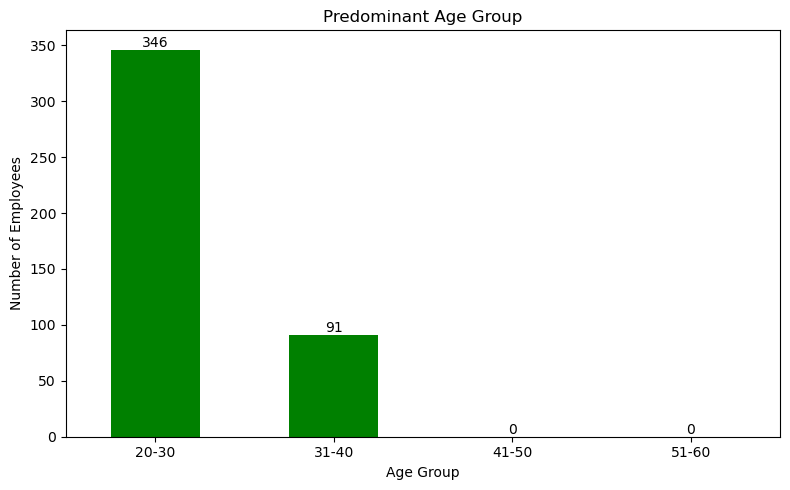

In [51]:
bins = [20, 30, 40, 50, 60]  # Adjust bins as needed
labels = ['20-30', '31-40', '41-50', '51-60']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)


age_group_distribution = df['age_group'].value_counts()
print("Age group distribution:")
print(age_group_distribution)

ax = age_group_distribution.plot(kind='bar', color='green', figsize=(8, 5))
plt.title("Predominant Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)


for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  
plt.show()


Salary expenditure by team and position:
Team                Position
Los Angeles Lakers  SF          31866445.0
Miami Heat          PF          31538671.0
Houston Rockets     SG          28122883.0
Phoenix Suns        PG          28002998.0
Denver Nuggets      SF          27982771.0
Name: Salary, dtype: float64


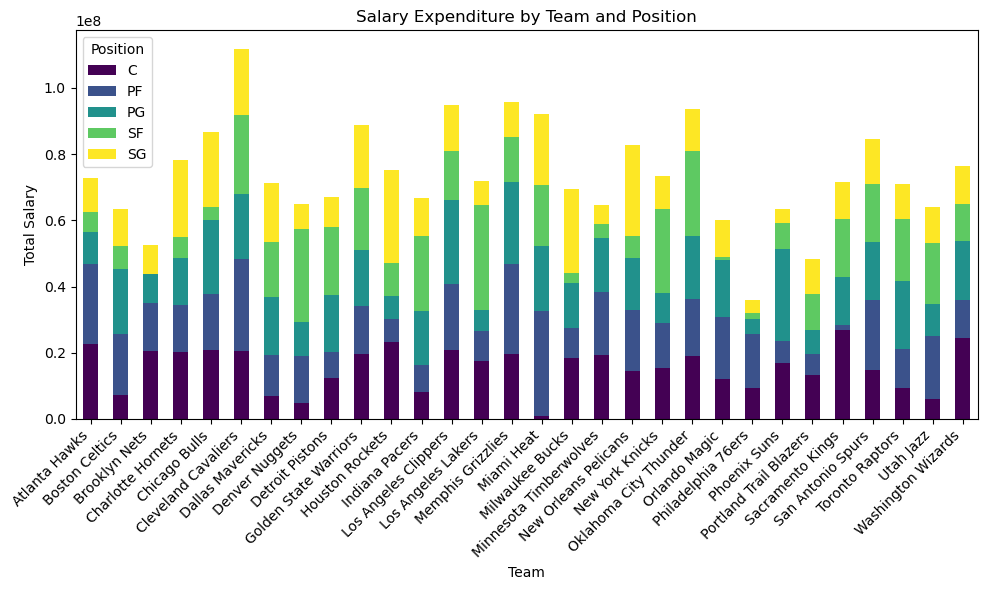

In [73]:
salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().sort_values(ascending=False)

print("Salary expenditure by team and position:")
print(salary_expenditure.head())

salary_pivot = salary_expenditure.unstack()
salary_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title("Salary Expenditure by Team and Position")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


Correlation between age and salary: 0.21


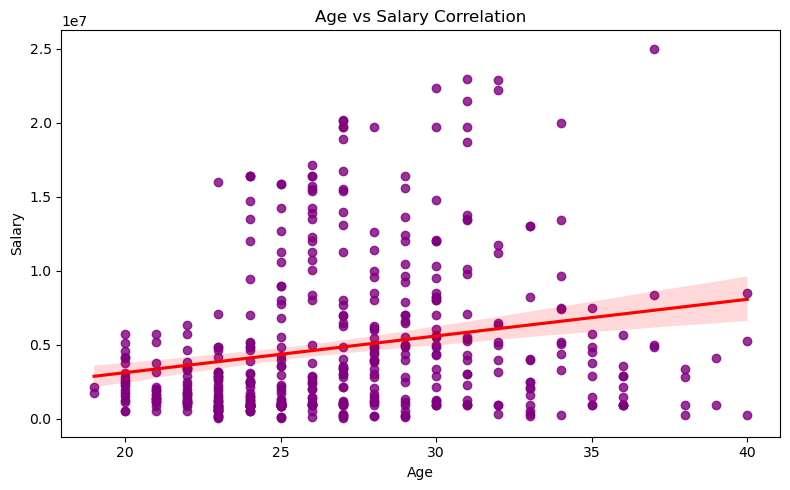

In [77]:
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {correlation:.2f}")

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()  
plt.show()


In [89]:
import os
import matplotlib.pyplot as plt

# Directory to save figures
output_dir = r'C:\Users\gouri\OneDrive\Desktop\python project\figures'
os.makedirs(output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Capitalize the first letter of each column name
df.columns = df.columns.str.capitalize()

# 1. Employee Distribution by Team (Pie Chart)
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

# Visualization with a pie chart
plt.figure(figsize=(10, 8))  # Increased size for more space
team_distribution.plot(kind='pie', autopct='%1.1f%%', cmap='Set3', legend=False, wedgeprops={'width': 0.3})
plt.title("Employee Distribution by Team")
plt.ylabel('')  # Remove the ylabel for a cleaner look
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(output_dir, 'employee_distribution_by_team.png'))

# Clear the plot after saving
plt.clf()

# 2. Employee Segregation by Position (Horizontal Bar Chart)
position_distribution = df['Position'].value_counts()

# Visualization with a horizontal bar chart
plt.figure(figsize=(8, 5))
position_distribution.plot(kind='barh', color='orange')
plt.title("Employee Distribution by Position")
plt.xlabel("Number of Employees")
plt.ylabel("Position")
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(output_dir, 'employee_distribution_by_position.png'))

# Clear the plot after saving
plt.clf()

# 3. Predominant Age Group (Bar Chart)
bins = [20, 30, 40, 50, 60]  # Adjust bins as needed
labels = ['20-30', '31-40', '41-50', '51-60']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Visualization with a bar chart
plt.figure(figsize=(8, 5))
df['Age_group'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Predominant Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(output_dir, 'predominant_age_group.png'))

# Clear the plot after saving
plt.clf()

# 4. Highest Salary Expenditure (Stacked Bar Chart)
salary_expenditure = df.groupby(['Team', 'Position'])['Salary'].sum().sort_values(ascending=False)

# Visualization with a stacked bar chart
salary_pivot = salary_expenditure.unstack()
plt.figure(figsize=(10, 6))
salary_pivot.plot(kind='bar', stacked=True, cmap='viridis')
plt.title("Salary Expenditure by Team and Position")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(output_dir, 'salary_expenditure_by_team_position.png'))

# Clear the plot after saving
plt.clf()

# 5. Correlation Between Age and Salary (Scatter Plot with Regression Line)
import seaborn as sns

# Scatter plot with a regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(output_dir, 'age_vs_salary_correlation.png'))

# Clear the plot after saving
plt.clf()

print("Figures have been saved to the directory:", output_dir)


Figures have been saved to the directory: C:\Users\gouri\OneDrive\Desktop\python project\figures


<Figure size 1000x800 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 800x500 with 0 Axes>